# Modelos de difusão

In [1]:
import networkx as nx
from numpy.random import default_rng
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

## Modelo SI

No modelo SI os nós da rede podem se encontrar em dois estados: suscetível (S) ou infectado (I).

Os indivíduos suscetíveis são aqueles que ainda não possuem a doença, ou não ficaram sabendo de uma notícia, mas podem se tornar infectados devido o contato com indivíduos infectados. 

Os infectados são aqueles que já possuem a doença ou já sabem da notícia e podem tornar os indivíduos suscetíveis em infectados ao entrar em contato com eles.

No **modelo SI** temos o parâmetro $\beta$ que representa a velocidade com que um indivíduo infectado contagia um dos seus vizinhos suscetíveis na rede.

Existem duas formas de analisar a dinâmica do processo a depender se o tempo é modelado: discreta ou contínua. 

Considere que $i$ é um indivíduo infectado e $j$ é um vizinho de $i$ suscetível. 

- No caso de tempo discreto, existe uma probabilidade $\beta$ de $i$ contagiar $j$, a cada unidade de tempo. 

- No caso de tempo contínuo, o tempo que leva para $j$ ser contagiado por $i$ segue uma distribuição exponencial com parâmetro $\beta$.

O processo se inicia com nós infectados que podem infectar os seus vizinhos.
Após um longo período de tempo todos os nós que pertencem a alguma componente contendo um nó infectado estarão infectados.

### Exemplo

Em uma simulação do modelo SI em tempo discreto cada nó da rede precisa de dois atributos, o estado atual e o próximo estado. 

Em cada instante de tempo, o processo tem duas fases:

1. Para cada vértice, se o estado dele for $S$(suscetível), deve avaliar-se a probabilidade de passar ao estado $I$(infectado). 

Se o vértice $i$ tiver $d^I(i)$ vizinhos infectados, então 
- a probabilidade dele não ser contagiado por esses vizinhos é
$$
p_{\mathrm{nc}} = (1-\beta)^{d^I(i)},
$$

- a probabilidade dele ser contagiado por esses vizinhos é
$$
\begin{align*}
p_{\mathrm{c}} & = 1-p_{\mathrm{nc}} = 1 - (1-\beta)^{d^I(i)}.
\end{align*}
$$

Uma vez calculada a probabilidade de contágio, pode-se decidir se o vértice passará ou não para o estado $I$.

2. Para cada vértice, atualiza-se o estado de acordo com o valor do próximo estado definido na primeira fase. 

O código a seguir trata este tipo de simulação, usando dois valores para $\beta$. 

A função **deepcopy()** serve para que as duas simulações sejam feitas com exatamente as mesmas condições iniciais.

In [9]:
# recebe a rede, 
# retorna o número de infectados
def numinf(G):
    num = 0
    for n in G.nodes:
        if G.nodes[n]['estado'] == 1:
            num += 1

    return num

In [10]:
# recebe a rede e um node infectado
# retorna o número de vizinhos de um infectado
def numinfviz(G,n):
    num = 0
    for m in nx.neighbors(G,n):
        if G.nodes[m]['estado'] == 1:
            num += 1
    
    return num

In [11]:
# modelo SI
# recebe:
# - G: rede
# - beta: velocidade da infeccao
# - M: número de iteracoes(simulacoes)
# - rng: variavel aleatoria
# retorna a fração de infectados
  
def si(G, beta, M, rng):
    
    delta = [0]*(M+1)
    delta[0] = numinf(G)/G.order() # qtd de vizinhos / qtd nodes de G
    # G.order(): retorna o numero de nodes no grafo

    for k in range(M):
        for n in G.nodes:
            if G.nodes[n]['estado'] == 0: # o vértice é suscetível?
                p = (1-(1-beta)**numinfviz(G,n)) # probabilidade de contagio
                if rng.random() < p: # o vertice contagia-se?
                    G.nodes[n]['estado-prox'] = 1
                else:
                    G.nodes[n]['estado-prox'] = 0
                    
        num = 0
        for n in G.nodes:
            if G.nodes[n]['estado'] == 0:
                G.nodes[n]['estado'] = G.nodes[n]['estado-prox']
            if G.nodes[n]['estado'] == 1:
                num += 1
        delta[k+1] = num/G.order()
        
    return delta


In [12]:
# incializa a rede de contagio
# recebe rede, probabilidade, v.a.
def init(G, p, rng):
    for n in G.nodes:
        G.nodes[n]['estado-prox'] = 0
        if rng.random() < p:
            G.nodes[n]['estado'] = 1 # I = 1
        else:
            G.nodes[n]['estado'] = 0 # S = 0

In [13]:
# construcao da rede barabasi albert

n = 100 # numero de nodes

# n nodes, m arestas são adicionadas sobre um novo node para um já existente
m = 3 # numero de arestas
G3 = nx.barabasi_albert_graph(n,m)

# n nodes, m arestas são adicionadas sobre um novo node para um já existente
m = 10
G10 = nx.barabasi_albert_graph(n,m)

# n nodes, 1 aresta é adicionada para um novo node para um já existente
m = 1
G1 = nx.barabasi_albert_graph(n,m)

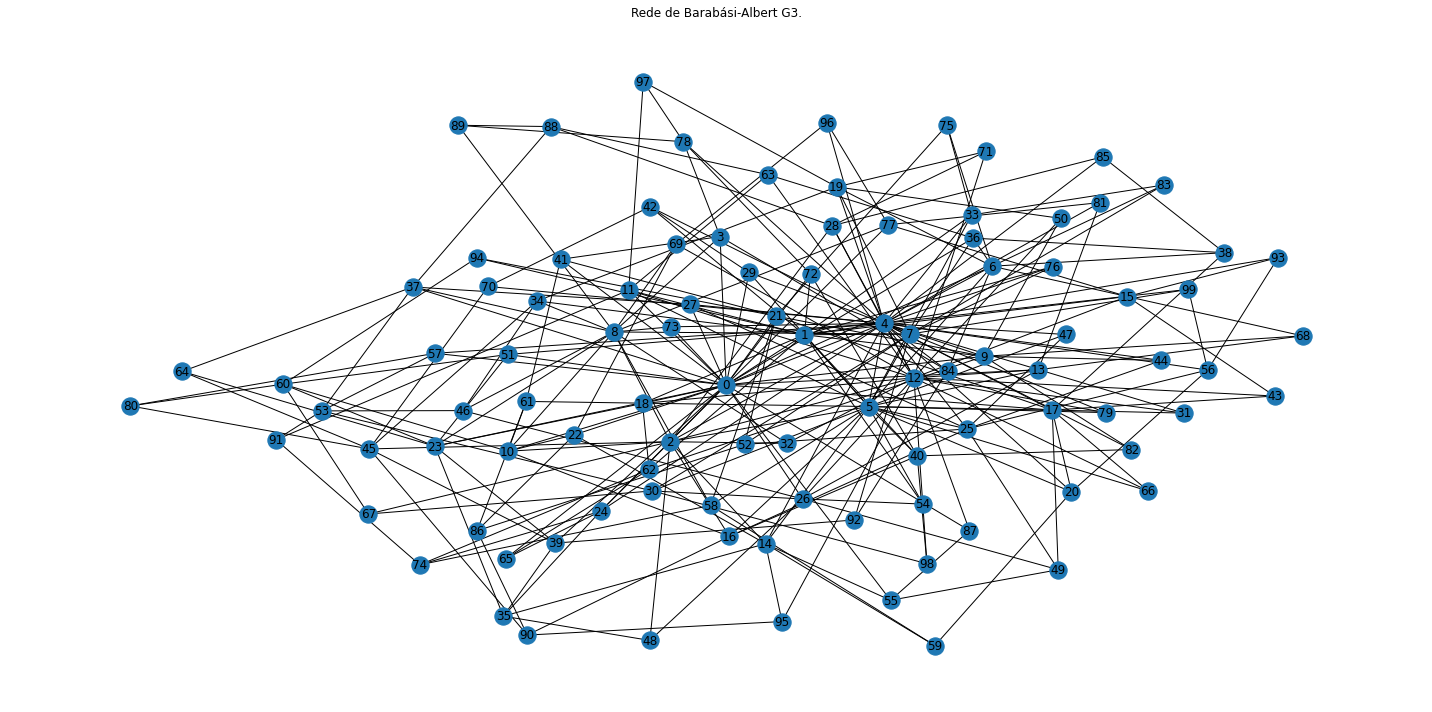

In [14]:
# gera gráfico de rede G3
fig = plt.subplots(1,1,figsize=(20,10))

ax = plt.gca()
seed = 1234
pos = nx.spring_layout(G3, seed=seed)
ax.set_title('Rede de Barabási-Albert G3.')
nx.draw(G3, pos=pos, with_labels=True,ax=ax)

plt.tight_layout()
plt.show()

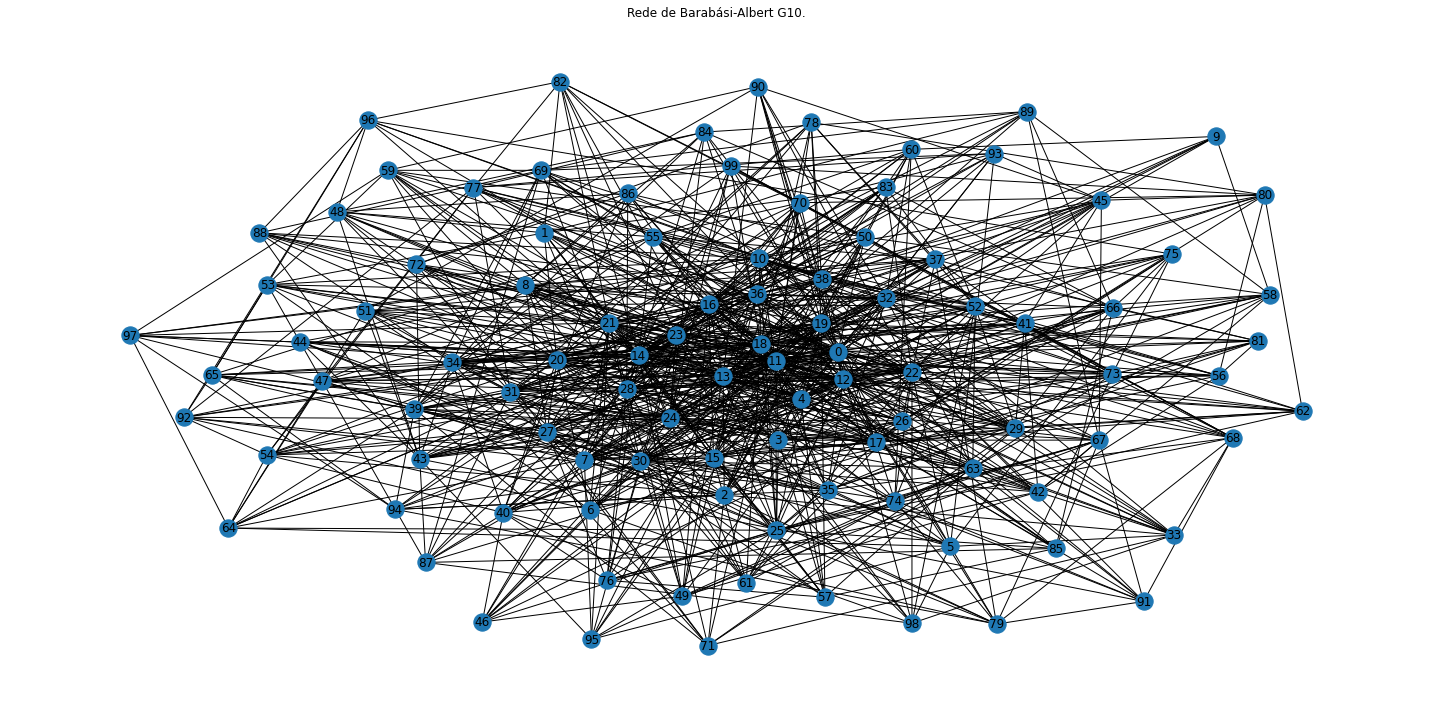

In [15]:
# gera grafico de rede  G10
fig = plt.subplots(1,1,figsize=(20,10))

ax = plt.gca()
seed = 1234
pos = nx.spring_layout(G10, seed=seed)
ax.set_title('Rede de Barabási-Albert G10.')
nx.draw(G10, pos=pos, with_labels=True,ax=ax)

plt.tight_layout()
plt.show()

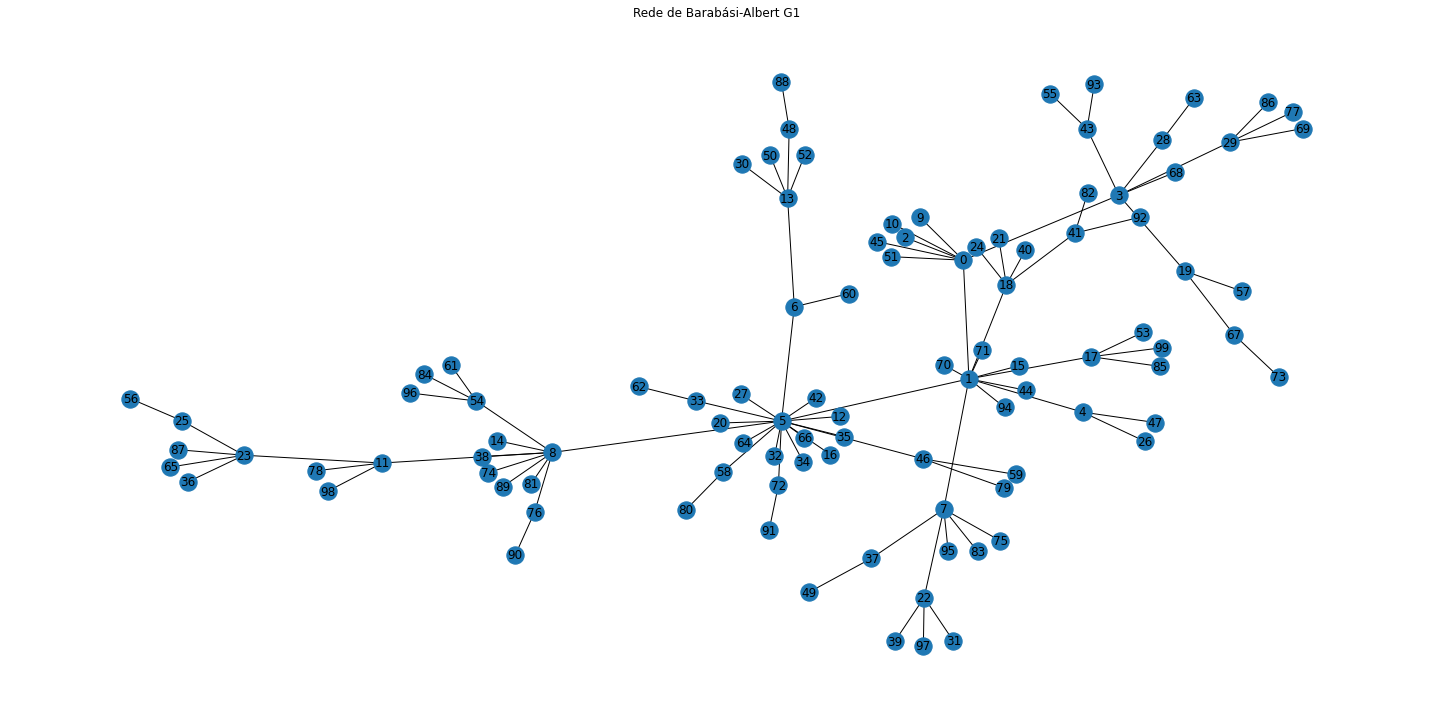

In [16]:
# gera grafico de rede G1
fig = plt.subplots(1,1,figsize=(20,10))

ax = plt.gca()
seed = 1234
pos = nx.spring_layout(G1, seed=seed)
ax.set_title('Rede de Barabási-Albert G1')
nx.draw(G1, pos=pos, with_labels=True,ax=ax)

plt.tight_layout()
plt.show()

In [17]:
# analise na rede G3

# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos nós estão inicialmente infectados
prob = 0.1
init(G3,prob,rng)

G = deepcopy(G3)
beta = 0.1
M = 200
dens1 = si(G,beta,M,rng)

G = deepcopy(G3)
beta = 0.01 
M = 200 # numero de simulacoes
dens2 = si(G,beta,M,rng)

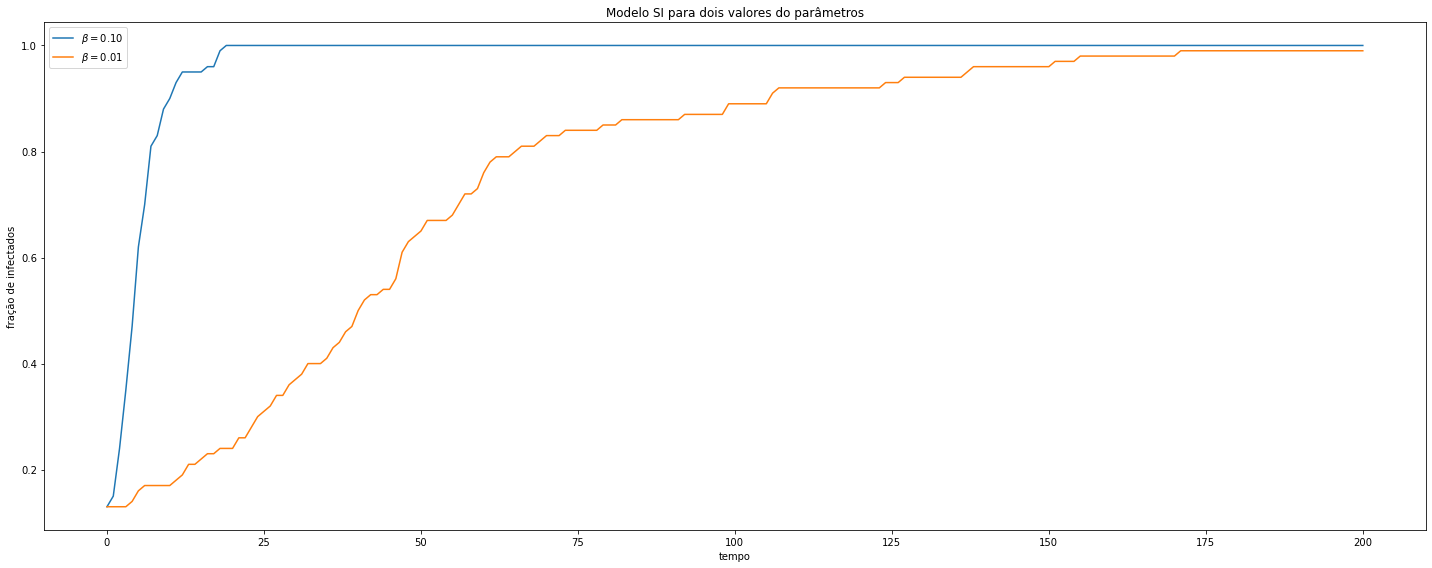

In [21]:
fig = plt.subplots(1,1,figsize=(20,8))
plt.plot(dens1,label=r'$\beta = 0.10$')
plt.plot(dens2,label=r'$\beta = 0.01$')

plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')

plt.title('Modelo SI para dois valores do parâmetros')

plt.tight_layout()
plt.show()

In [22]:
# rede G10

# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos nós estão inicialmente infectados
prob = 0.1
init(G10,prob,rng)

G = deepcopy(G10)
beta = 0.1
M = 200
dens1 = si(G,beta,M,rng)

G = deepcopy(G10)
beta = 0.01
M = 200
dens2 = si(G,beta,M,rng)

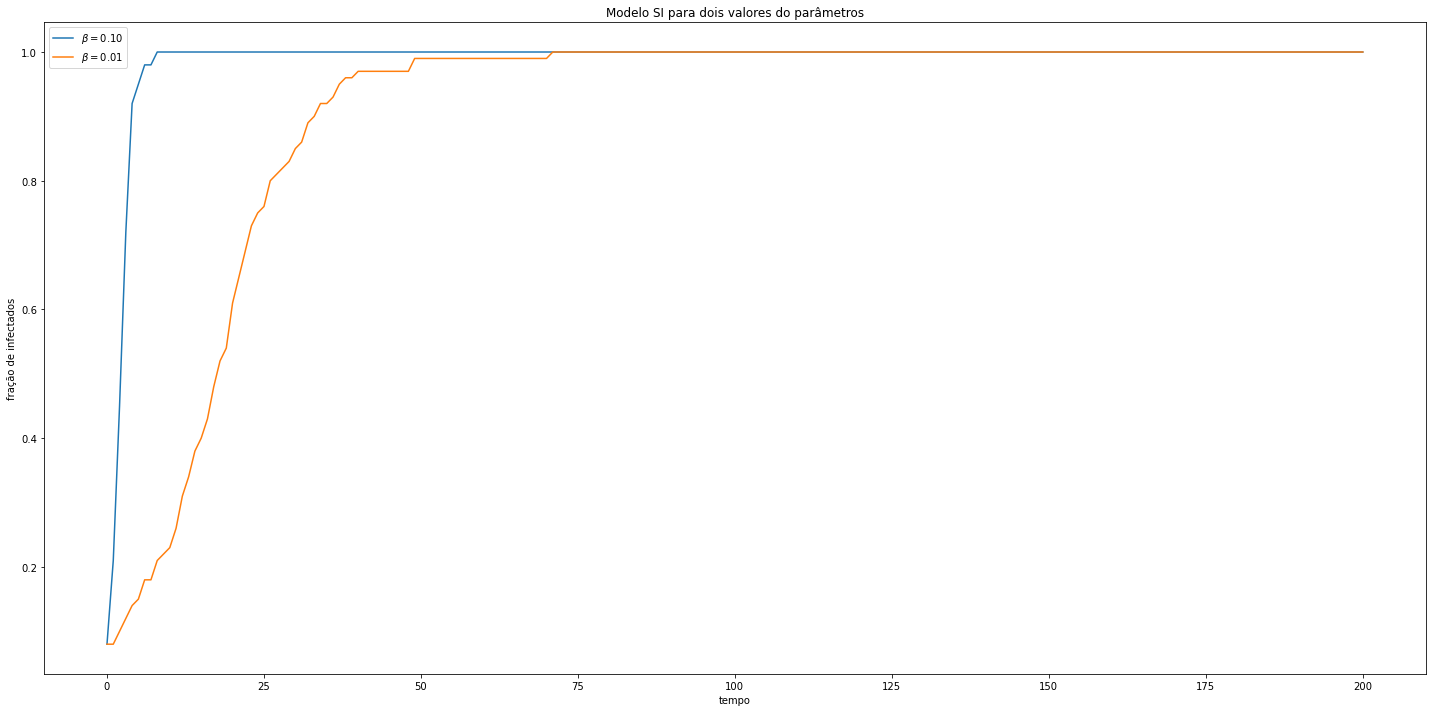

In [23]:
fig = plt.subplots(1,1,figsize=(20,10))
plt.plot(dens1,label=r'$\beta = 0.10$')
plt.plot(dens2,label=r'$\beta = 0.01$')

plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')

plt.title('Modelo SI para dois valores do parâmetros')

plt.tight_layout()
plt.show()

In [24]:
# rede G1

# gerador de números aleatórios
rng = default_rng()

# aproximadamente 10% dos nós estão inicialmente infectados
prob = 0.1
init(G1,prob,rng)

G = deepcopy(G1)
beta = 0.1
M = 200
dens1 = si(G,beta,M,rng)

G = deepcopy(G1)
beta = 0.01
M = 200
dens2 = si(G,beta,M,rng)

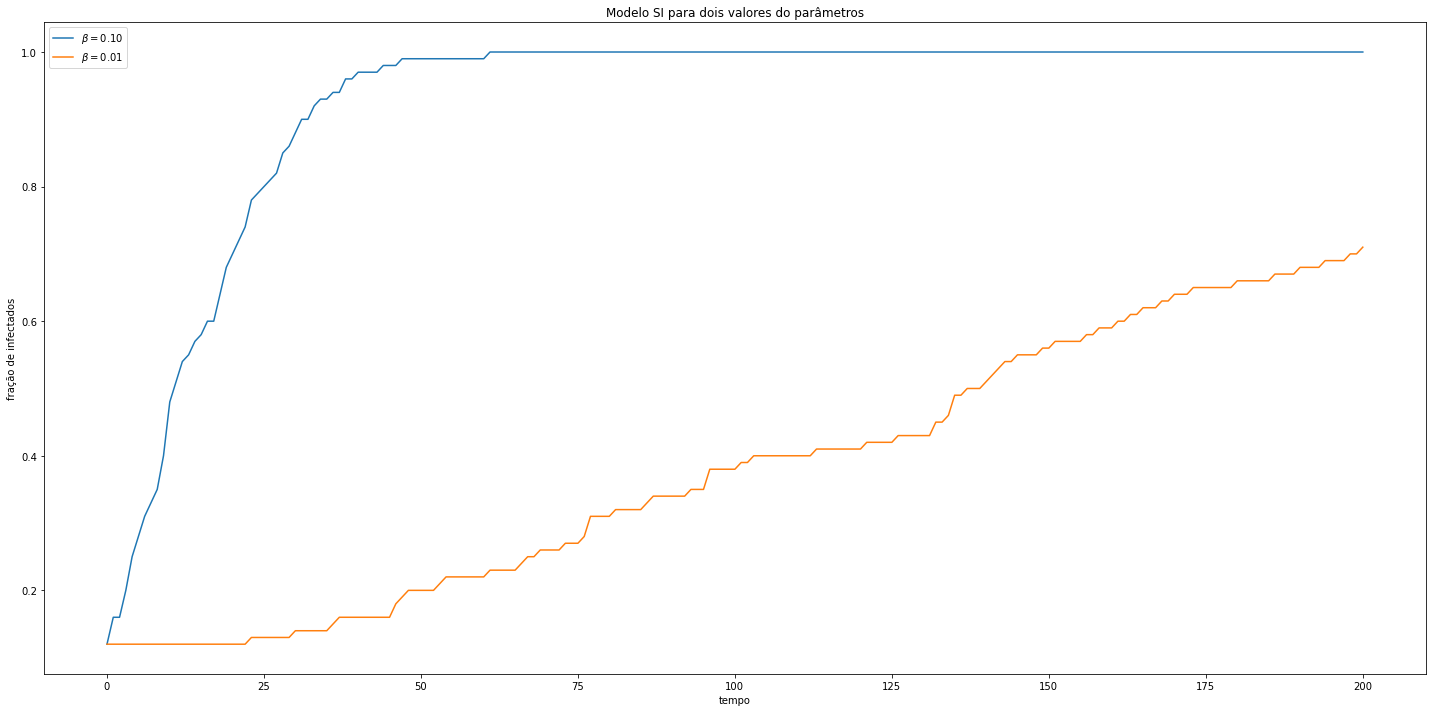

In [25]:
fig = plt.subplots(1,1,figsize=(20,10))

plt.plot(dens1,label=r'$\beta = 0.10$')
plt.plot(dens2,label=r'$\beta = 0.01$')

plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SI para dois valores do parâmetros')

plt.tight_layout()
plt.show()

### Exemplo

Existem várias maneiras de frear o espalhamento de uma doença. 

Por exemplo, podem-se isolar partes da rede apagando arestas. 

Se existirem arestas pontes, estas seriam as melhores arestas para serem removidas porque produziriam uma separação do grafo em subgrafos isolados. 

O código a seguir arestas são removidas ao acaso.

In [26]:
# recebe rede, probabilidade e v.a.
# retorna rede com arestas removidas
def removeedges(G,p,rng):
    remove = []
    for u,v in G.edges:
        if rng.random() < p:
            remove.append((u,v))        
    G.remove_edges_from(remove)
    
    return G

In [27]:
p = np.linspace(0,0.5,10) # retornar lista com numeros uniformemente espaçados em um intervalo especificado.
den = np.zeros_like(p) # retorna uma matriz de zeros com o mesmo formato e tipo de uma matriz fornecida.

print(f"p : {p}")

for k in range(p.shape[0]):
    for i in range(100):
        G = nx.barabasi_albert_graph(100,1)
        init(G,0.1,rng)
        G = removeedges(G,p[k],rng)
        dens = si(G,0.1,200,rng) # T=200
        den[k] += dens[-1]
    print(k,den[k])

p : [0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5       ]
0 100.0
1 92.69999999999999
2 85.77000000000001
3 78.33
4 71.80000000000001
5 62.98000000000001
6 57.41999999999999
7 52.58
8 46.01999999999999
9 38.12


[100.    92.7   85.77  78.33  71.8   62.98  57.42  52.58  46.02  38.12]


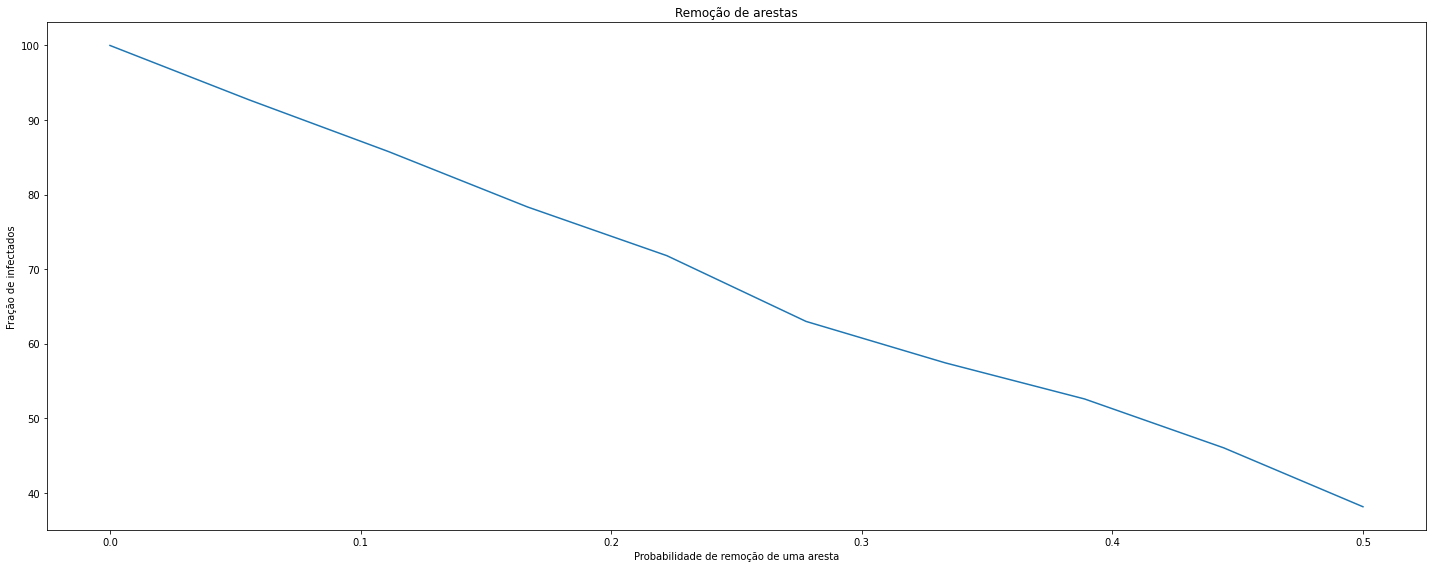

In [29]:
# fração de vértices infectados em tempo T=200 como uma função da probabilidade de remoção de uma aresta(valores médios de 100 simulações). 
# a fração de vértices infectados é menor do que a fração média de arestas não removidas.

#den = den/100
print(den)

fig = plt.subplots(1,1,figsize=(20,8))

plt.plot(p,den)
plt.xlabel('Probabilidade de remoção de uma aresta')
plt.ylabel('Fração de infectados')
plt.title('Remoção de arestas')

plt.tight_layout()
plt.show()

### Exemplo

Uma outra alternativa é remover vértices da rede, ou seja, isolar alguns nós da rede. 

Se os vértices infectados forem conhecidos, estes são os melhores nós para serem removidos.

In [30]:
# recebe rede, probabilidade e v.a.
# retorna rede com vertices removidos
def removenodes(G,p,rng):
    preserve = []
    for n in G.nodes:
        if rng.random() > p:
            preserve.append(n)
            
    G = nx.subgraph(G,preserve)
    
    return G

In [31]:
# fração de vértices infectados em tempo T=200 como uma função da probabilidade de remoção de uma aresta(valores médios de 100 simulações). 
# a fração de vértices infectados é menor do que a fração média de arestas não removidas.

p = np.linspace(0,0.5,10)
den = np.zeros_like(p)

for k in range(p.shape[0]):
    for i in range(100):
        G = nx.barabasi_albert_graph(100,1)
        init(G,0.1,rng)
        G = removenodes(G,p[k],rng)
        dens = si(G,0.1,200,rng) # T=200
        den[k] += dens[-1]
    print(k,den[k])

0 100.0
1 91.43563891779583
2 84.5692841251604
3 76.17617404343298
4 71.07475793257953
5 63.829450290054794
6 57.07064602159601
7 48.816397952257276
8 45.754924091756365
9 36.007802022454214


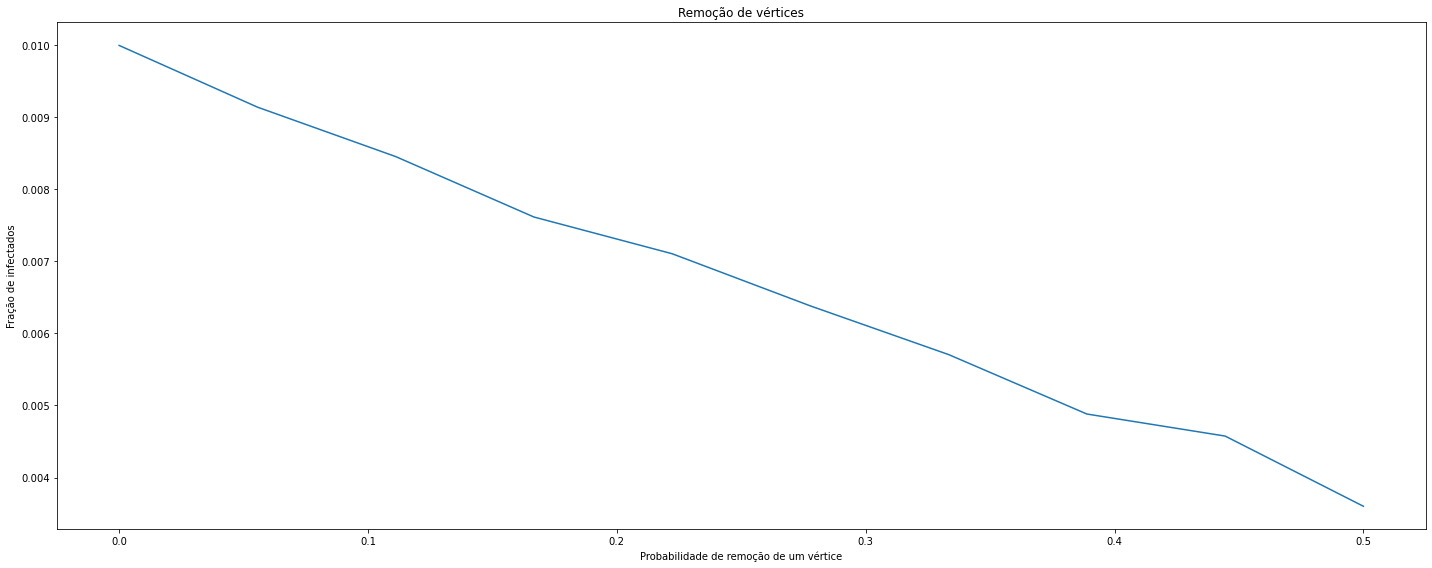

In [33]:
# Fração final de vértices infectados em tempo T = 200 como uma função da probabilidade de remoção de um vértice. 
# A fração de vértices infectados é menor do que a fração média de nós não removidos.

den = den/100

fig = plt.subplots(1,1,figsize=(20,8))

plt.plot(p,den)
plt.xlabel('Probabilidade de remoção de um vértice')
plt.ylabel('Fração de infectados')
plt.title('Remoção de vértices')

plt.tight_layout()
plt.show()

### Exemplo

A simulação do modelo **SI** em tempo contínuo é mais complicada do que em tempo discreto. 

Considere que o vértice $i$ é suscetível e o seu vizinho $j$ está infectado. 

O tempo até $j$ contagiar ao $i$ é dado por
$$
T_{ji} \sim \mathrm{Exp}(\beta).
$$

Suponha que o conjunto de vizinhos infectados do vértice $i$ é $N^I(i) = \{ j_1, j_2, \cdots, j_{d^I(i)} \}$. 
Logo, o tempo até $i$ ficar infectado é
$$
T_{\cdot i} = \min_{j\in N^I(i)} T_{ji} \sim \mathrm{Exp}\left(d^I(i)\beta\right),
$$

Seja $t_k$ o tempo infecção número $k$ numa rede, o tempo até a próxima infecção é
$$
t_{k+1} - t_k = \min_{i\in S(t_k)} T_{\cdot i} \sim \mathrm{Exp}\left(\sum\limits_{i\in S(t_k)} d^I(i)\beta\right).
$$
onde $S(t_k)$ é o conjunto de vértices suscetíveis em tempo $t_k^+$.

Passo a passo da simulação:

1. Depois da infecção número $k$, o algoritmo gera um tempo aleatório até a próxima infecção com distribuição exponencial de parâmetro $\sum\limits_{i\in S(t_k)} d^I(i)\beta$. 

2. Seja $S(t_k) = \{i_1,i_2,\cdots,i_S\}$ o conjunto de vértices suscetíveis em tempo $t_k^+$. 
Para decidir qual vértice suscetível fica infectado em tempo $t_{k+1}$, procura-se o mínimo $h$ de tal modo que
$$
\sum\limits_{u = 1}^h d^I(i_u)\beta > r \sum\limits_{i\in S(t_k)} d^I(i)\beta,
$$
onde $r \in [0,1)$.

Este algoritmo de simulação é conhecido como de **Gillespie**. 

Os códigos a seguir implementam esse algoritmo. 

In [34]:
# recebe: rede, beta, T, e v.a. rng
# retorna: tempo e fracao de infectados
def sic(G, beta, T, rng):

    num = numinf(G)    
    delta = [num/G.order()]
    t = [0]
    par = np.zeros(G.order())
    
    # nodes podem ter nomes arbitrarios
    k = 0
    vert = dict()
    for n in G.nodes:
        vert[k] = n
        k += 1
    
    while t[-1] < T:
        k = 0
        for n in G.nodes:
            if G.nodes[n]['estado'] == 0: # o vértice é suscetível?
                par[k] = numinfviz(G,n)*beta
            else:
                par[k] = 0
            k += 1
        par = np.cumsum(par) # retorna a soma cumulativa dos elementos
        if par[-1] == 0: # não tem vértices suscetíveis
            break
        DeltaT = rng.exponential(1/par[-1])
        t.append(t[-1]+DeltaT)
        kinf = np.searchsorted(par,rng.random()*par[-1]) # encontrar indices onde os elementos devem ser inseridos para manter a ordem
        G.nodes[vert[kinf]]['estado'] = 1
        num += 1
        delta.append(num/G.order())

    if t[-1] < T:
        t.append(T)
        delta.append(delta[-1])
    
    return t, delta

In [35]:
# resultados para dois valores de $\beta$ na rede G3

# gerador de números aleatórios
rng = default_rng()

#aproximadamente um 10% dos vértices estão inicialmente infectados
prob = 0.1
init(G3,prob,rng)

G = deepcopy(G3)
beta = 0.1
T = 100
t1, dens1 = sic(G,beta,T,rng)

G = deepcopy(G3)
beta = 0.01
T = 100
t2, dens2 = sic(G,beta,T,rng)

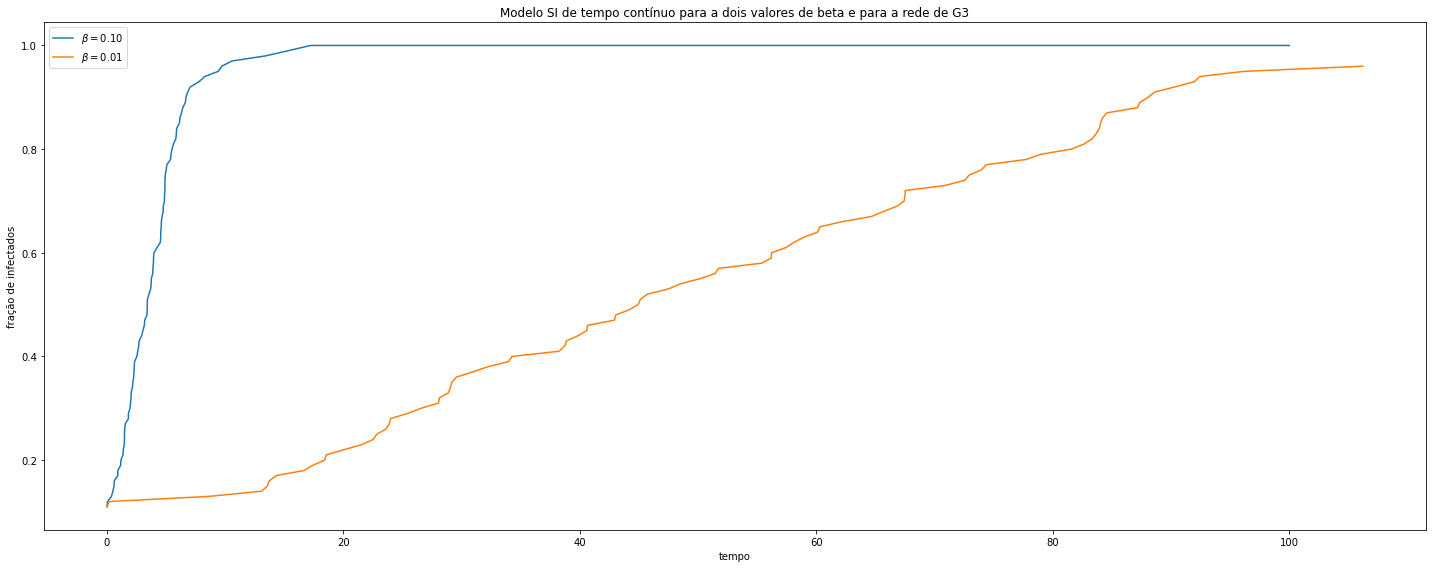

In [37]:
fig = plt.subplots(1,1,figsize=(20,8))
plt.plot(t1,dens1,label=r'$\beta = 0.10$')
plt.plot(t2,dens2,label=r'$\beta = 0.01$')

plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SI de tempo contínuo para a dois valores de beta e para a rede de G3')

plt.tight_layout()
plt.show()

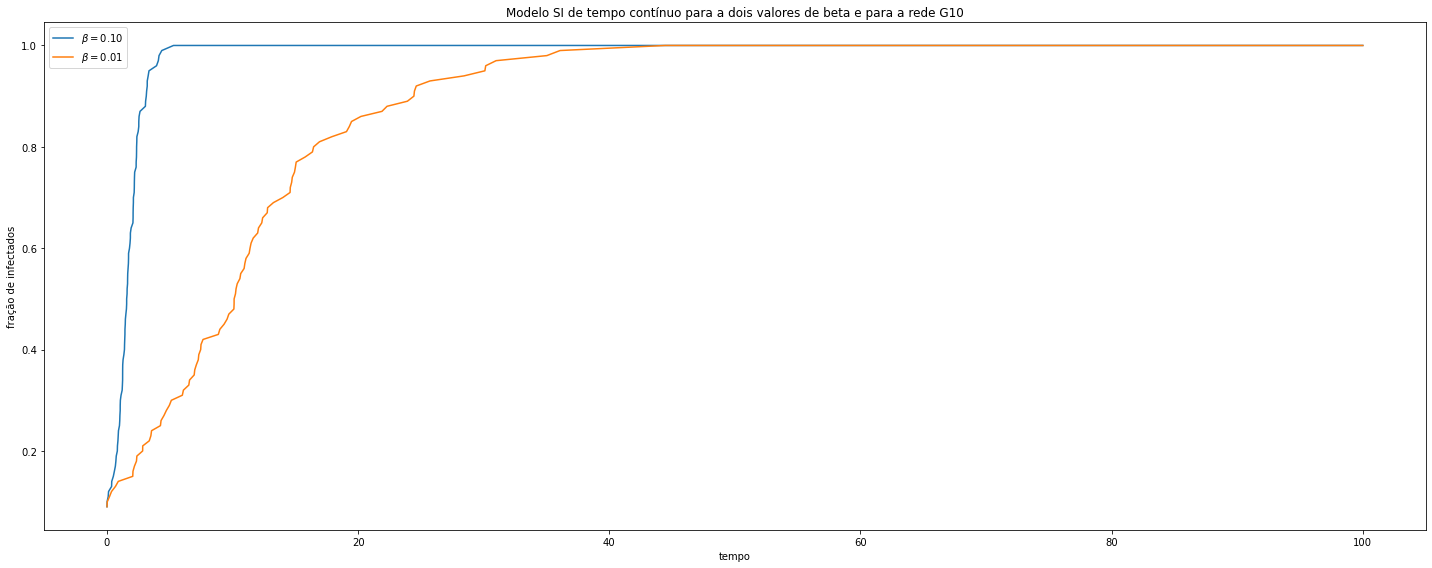

In [39]:
# resultados para dois valores de $\beta$ para a rede G10

# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos vértices estão inicialmente infectados
prob = 0.1
init(G10,prob,rng)

G = deepcopy(G10)
beta = 0.1
T = 100
t1, dens1 = sic(G,beta,T,rng)

G = deepcopy(G10)
beta = 0.01
T = 100
t2, dens2 = sic(G,beta,T,rng)

fig = plt.subplots(1,1,figsize=(20,8))
plt.plot(t1,dens1,label=r'$\beta = 0.10$')
plt.plot(t2,dens2,label=r'$\beta = 0.01$')

plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SI de tempo contínuo para a dois valores de beta e para a rede G10')

plt.tight_layout()

plt.show()

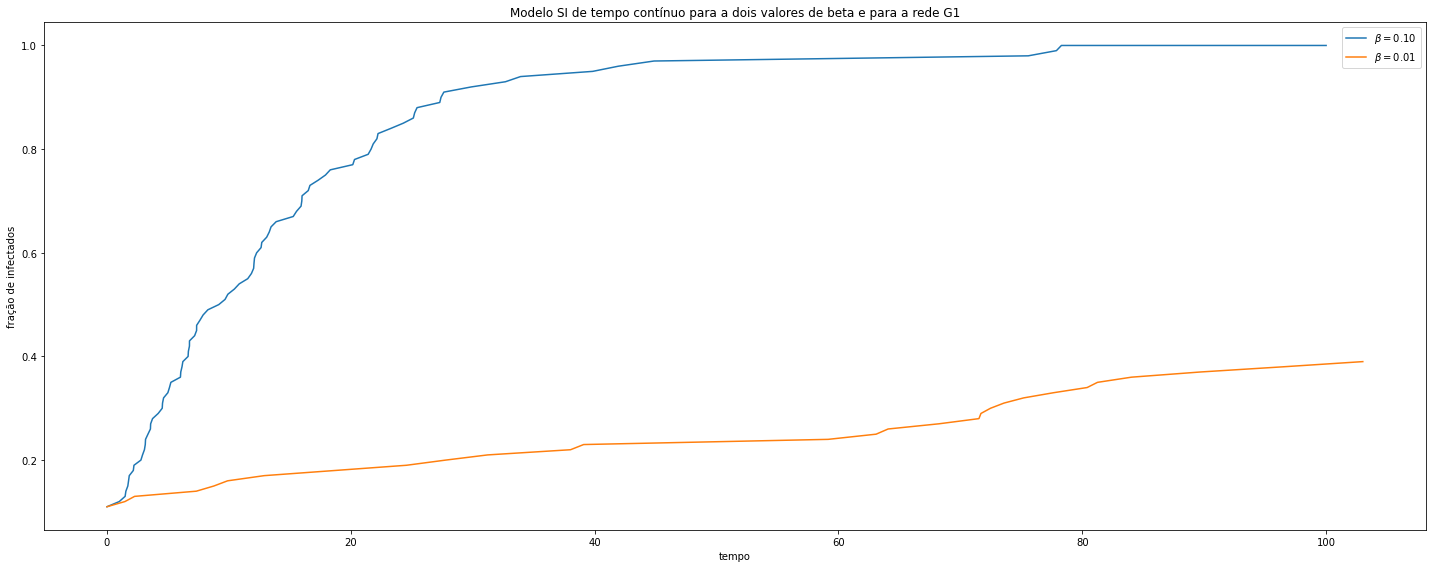

In [40]:
# resultados para dois valores de $\beta$ para a rede G1

# gerador de números aleatórios
rng = default_rng()

#aproximadamente um 10% dos vértices estão inicialmente infectados
prob = 0.1
init(G1,prob,rng)

G = deepcopy(G1)
beta = 0.1
T = 100
t1, dens1 = sic(G,beta,T,rng)

G = deepcopy(G1)
beta = 0.01
T = 100
t2, dens2 = sic(G,beta,T,rng)

fig = plt.subplots(1,1,figsize=(20,8))
plt.plot(t1,dens1,label=r'$\beta = 0.10$')
plt.plot(t2,dens2,label=r'$\beta = 0.01$')

plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SI de tempo contínuo para a dois valores de beta e para a rede G1')

plt.tight_layout()
plt.show()